# introduce:
Pandas是现在比较流行的开源数据处理模块。广泛应用于机器学习，深度学习领域。通过Pandas我们可以快速读取Data Set，将Data Set进行转换、过滤、分析等操作。当然，NumPy强大的地方在于科学数值计算，Pandas强大的功能则是处理缺失数据以及数据透视功能，非常适合对Data Set进行预处理。

- 数据类型
- 数据读取
- 数据选择
- 数据删减
- 数据填充

> NumPy & Pandas 不同：  
如果用 python 的列表和字典来作比较, 那么可以说 Numpy 是列表形式的，没有数值标签，而 Pandas 就是字典形式。Pandas是基于Numpy构建的，让Numpy为中心的应用变得更加简单。

## special data type(特殊的数据类型)：
Series（一维数组），DataFrame（二维数组），Panel（三维数组），Panel4D（四维数组），PanelND（更多维数组）。其中 Series 和 DataFrame 是最常用的两种数据，通常在一般项目中大部分都只会采用一维数组以及二维数组。

### Series：
Series 是Pandas中的一维数组形式。其可以存储整数、浮点数、字符串等类型的数据。
```
pandas.Series(data = None, index = None)
```
- data:可以是dict也可以是NumPy的ndarray
- index：数据下标索引，方便快捷定位数据

In [5]:
%matplotlib inline
import pandas as pd

# Series内的数值类型默认为int64
s = pd.Series({'N': 100, 'B': 1000, 'A': 10000})
s


N      100
B     1000
A    10000
dtype: int64

In [6]:
type(s)

pandas.core.series.Series

In [10]:
import numpy as np
a = np.random.randn(5)
print(a)
s = pd.Series(a) # Series会将index0～5: 对应每一个Numpy的ndarray元素
s

[ 2.18600389  0.94827417  0.03041306 -1.69865215 -2.12969306]


0    2.186004
1    0.948274
2    0.030413
3   -1.698652
4   -2.129693
dtype: float64

## DataFrame
DataFrame是Pandas中的二维数组。它有点类似于我们常用的Excel表格数据和存储在DataBase中的Sql表结构类似。他就好像是由多个Series组合而成，拥有row index & column index.盗个图：
![](https://cdn.jsdelivr.net/gh/Lyli724/Blogs_image@master/uPic/xmv8mo.png)
[source](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/)
```python
pandas.DataFrame(data = None, index = None, columns = None)
```
- data:可以是dict也可以是NumPy的ndarray
- index：数据下标索引，方便快捷定位数据
- columns: 数据列下标索引

In [58]:
# 使用Series构建DataFrame
df = pd.DataFrame({'A': pd.Series([1, 2, 3]), 'B': pd.Series([4, 5, 6])})
df  # 因为没有指定索引，一般从0开始第一列是索引值

,A,B
0,1,4
1,2,5
2,3,6


In [59]:
print(df['B']) # 根据列名打印出指定列的数据

0    4
1    5
2    6
Name: B, dtype: int64


In [60]:
print(df.values) # 打印data

[[1 4]
 [2 5]
 [3 6]]


In [12]:
# 使用list构建DataFrame
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
df

,A,B
0,1,4
1,2,5
2,3,6


In [13]:
# 通过带字典的列表构建DataFrame
df = pd.DataFrame([{'A':1, 'B': 4},
                   {'A':2, 'B': 5},
                   {'A':3, 'B': 6}])
df

,A,B
0,1,4
1,2,5
2,3,6


In [16]:
# 通过ndarray构建DataFrame
df = pd.DataFrame(np.random.randint(10, size = (3, 4)))
df

,0,1,2,3
0,4,3,1,0
1,1,2,4,5
2,6,0,5,1


> Series就好比是一维的DataFrame，但Series却没有columns索引

In [17]:
pd.Series(np.random.randint(10, size = (5, )))

0    9
1    5
2    3
3    6
4    5
dtype: int64

In [18]:
pd.DataFrame(np.random.randint(10, size = (5, )))

,0
0,3
1,0
2,3
3,3
4,3


## 读取数据（read data）：
想要进行数据分析必须将数据读取出来。比较常用的是读取CSV文件。常使用的方法是pandas.read_csv(), 参数可以是一个本地的相对路径或者是一个URL地址
> 将读取的数据转换为pickle df.to_pickle('file name)

In [64]:
df = pd.read_csv("https://labfile.oss.aliyuncs.com/courses/906/los_census.csv")
df

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36
3,90003,66266,26.3,32631,33635,15642,4.22
4,90004,62180,34.8,31302,30878,22547,2.73
...,...,...,...,...,...,...,...
314,93552,38158,28.4,18711,19447,9690,3.93
315,93553,2138,43.3,1121,1017,816,2.62
316,93560,18910,32.4,9491,9419,6469,2.92
317,93563,388,44.5,263,125,103,2.53


因为CSV文件存储的格式是一个二维的表格，Pandas读入数据后会自动转换为DataFrame存储。还有很多Others 方法可以进行其他类型的数据读取。pd.read_.....(...读取数据文件名)

### 基本操作
DataFrame的结构主要由index（索引），columns name（列名称）以及data（数据）
![](https://cdn.jsdelivr.net/gh/Lyli724/Blogs_image@master/uPic/AbgqI4.png)


In [21]:
# use head(n)拿出读取的数据的前n行数据
df.head(10)

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36
3,90003,66266,26.3,32631,33635,15642,4.22
4,90004,62180,34.8,31302,30878,22547,2.73
5,90005,37681,33.9,19299,18382,15044,2.50
6,90006,59185,32.4,30254,28931,18617,3.13
7,90007,40920,24.0,20915,20005,11944,3.00
8,90008,32327,39.7,14477,17850,13841,2.33
9,90010,3800,37.8,1874,1926,2014,1.87


In [22]:
# use tail(n)拿出读取的数据的尾部n行数据
df.tail(10)

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
309,93536,70918,34.4,37804,33114,20964,3.07
310,93543,13033,32.9,6695,6338,3560,3.66
311,93544,1259,52.4,689,570,569,2.20
312,93550,74929,27.5,36414,38515,20864,3.58
313,93551,50798,37.0,25056,25742,15963,3.18
314,93552,38158,28.4,18711,19447,9690,3.93
315,93553,2138,43.3,1121,1017,816,2.62
316,93560,18910,32.4,9491,9419,6469,2.92
317,93563,388,44.5,263,125,103,2.53
318,93591,7285,30.9,3653,3632,1982,3.67


In [23]:
# use describe() 对读取的Data Set进行描述，输出Data Set中每一列的count， max_value, min_value
df.describe()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,91000.673981,33241.341693,36.527586,16391.564263,16849.777429,10964.570533,2.828119
std,908.360203,21644.417455,8.692999,10747.495566,10934.986468,6270.646400,0.835658
min,90001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90243.500000,19318.500000,32.400000,9763.500000,9633.500000,6765.500000,2.435000
50%,90807.000000,31481.000000,37.100000,15283.000000,16202.000000,10968.000000,2.830000
75%,91417.000000,44978.000000,41.000000,22219.500000,22690.500000,14889.500000,3.320000
max,93591.000000,105549.000000,74.000000,52794.000000,53185.000000,31087.000000,4.670000


In [24]:
# use .values方法将DataFrame转换为NumPy的ndarray
df.values

array([[9.1371e+04, 1.0000e+00, 7.3500e+01, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [9.0001e+04, 5.7110e+04, 2.6600e+01, ..., 2.8642e+04, 1.2971e+04,
        4.4000e+00],
       [9.0002e+04, 5.1223e+04, 2.5500e+01, ..., 2.6347e+04, 1.1731e+04,
        4.3600e+00],
       ...,
       [9.3560e+04, 1.8910e+04, 3.2400e+01, ..., 9.4190e+03, 6.4690e+03,
        2.9200e+00],
       [9.3563e+04, 3.8800e+02, 4.4500e+01, ..., 1.2500e+02, 1.0300e+02,
        2.5300e+00],
       [9.3591e+04, 7.2850e+03, 3.0900e+01, ..., 3.6320e+03, 1.9820e+03,
        3.6700e+00]])

In [63]:
df

,A,B
0,1,4
1,2,5
2,3,6


In [26]:
# use .index查看索引
df.index

RangeIndex(start=0, stop=319, step=1)

In [27]:
# use .columns查看列名
df.columns

Index(['Zip Code', 'Total Population', 'Median Age', 'Total Males',
       'Total Females', 'Total Households', 'Average Household Size'],
      dtype='object')

In [28]:
# use .shape查看Data Set形状
df.shape

(319, 7)

### choose data（选择数据）
#### 通过index选择
Pandas中可以使用.iloc方法按照索引选择数据，也可以按照切片的方式

In [29]:
df.iloc[: 5] # 取data的前5行数据

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36
3,90003,66266,26.3,32631,33635,15642,4.22
4,90004,62180,34.8,31302,30878,22547,2.73


In [30]:
df.iloc[5] # 取特定的某一行data

Zip Code                  90005.0
Total Population          37681.0
Median Age                   33.9
Total Males               19299.0
Total Females             18382.0
Total Households          15044.0
Average Household Size        2.5
Name: 5, dtype: float64

In [31]:
df.iloc[[2, 5, 6]] # 取多行数据

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
2,90002,51223,25.5,24876,26347,11731,4.36
5,90005,37681,33.9,19299,18382,15044,2.50
6,90006,59185,32.4,30254,28931,18617,3.13


In [32]:
df.iloc[:, 1: 5] # 选择数据列

,Total Population,Median Age,Total Males,Total Females
0,1,73.5,0,1
1,57110,26.6,28468,28642
2,51223,25.5,24876,26347
3,66266,26.3,32631,33635
4,62180,34.8,31302,30878
...,...,...,...,...
314,38158,28.4,18711,19447
315,2138,43.3,1121,1017
316,18910,32.4,9491,9419
317,388,44.5,263,125


### 通过数据的lable name选择
通常使用.loc[]进行选择
.loc[]中可接受的参数：
- 单个标签。例如：`2` 或 `'a'`，这里的 `2` 指的是标签而不是索引位置。
- 列表或数组包含的标签。例如：`['A', 'B', 'C']`。
- 切片对象。例如：`'A':'E'`，注意这里和上面切片的不同支持，首尾都包含在内。
- 布尔数组。
- 可返回标签的函数或参数。

In [33]:
df.loc[0: 4] # 选择前5行

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36
3,90003,66266,26.3,32631,33635,15642,4.22
4,90004,62180,34.8,31302,30878,22547,2.73


In [34]:
df.loc[[1, 3, 5]] # 选择指定的行

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
1,90001,57110,26.6,28468,28642,12971,4.40
3,90003,66266,26.3,32631,33635,15642,4.22
5,90005,37681,33.9,19299,18382,15044,2.50


In [35]:
df.loc[:, 'Zip Code': 'Median Age']

,Zip Code,Total Population,Median Age
0,91371,1,73.5
1,90001,57110,26.6
2,90002,51223,25.5
3,90003,66266,26.3
4,90004,62180,34.8
...,...,...,...
314,93552,38158,28.4
315,93553,2138,43.3
316,93560,18910,32.4
317,93563,388,44.5


In [36]:
df.loc[[0, 2], 'Median Age':] #选择第0行与第2行Median Age（包括)以后的列

,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,73.5,0,1,1,1.00
2,25.5,24876,26347,11731,4.36


# 根据混合的ix选择数据
pd.DataFrame.ix[]

## 删除数据（delete data）
Pandas删除不需要的数据有点类似SQL中删除表。以.drop开头的方法与删除数据有关
```python
DataFrame.drop(labels = None, axis = 0 or 1)
```
- labels:我们可以指定删除的标签参数，比如上面df的数据列名
- axis:指定删除是按照按列删除还是按行删除axis = 1按列删除，反之，按行删除

In [37]:
df.drop(labels = ['Median Age', 'Total Males'], axis = 1)

,Zip Code,Total Population,Total Females,Total Households,Average Household Size
0,91371,1,1,1,1.00
1,90001,57110,28642,12971,4.40
2,90002,51223,26347,11731,4.36
3,90003,66266,33635,15642,4.22
4,90004,62180,30878,22547,2.73
...,...,...,...,...,...
314,93552,38158,19447,9690,3.93
315,93553,2138,1017,816,2.62
316,93560,18910,9419,6469,2.92
317,93563,388,125,103,2.53


In [38]:
# use DataFrame.drop.duplicates()进行数据去重
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
314    False
315    False
316    False
317    False
318    False
Length: 319, dtype: bool

In [39]:
# use DataFrane,dropna() 用于删除Data Set中空缺的数据列或行
df.dropna()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36
3,90003,66266,26.3,32631,33635,15642,4.22
4,90004,62180,34.8,31302,30878,22547,2.73
...,...,...,...,...,...,...,...
314,93552,38158,28.4,18711,19447,9690,3.93
315,93553,2138,43.3,1121,1017,816,2.62
316,93560,18910,32.4,9491,9419,6469,2.92
317,93563,388,44.5,263,125,103,2.53


## 填充数据
我们会对一些Data Set中缺少值的的位置进行填充，在生活中，有可能因为一些其他因素造成数据丢失，我们称这种值为缺失值。
### 判断缺失值
Pandas在读取数据的时候会将缺失值（即使是不同类型的）数据采用NaN标记。
> 时间戳的丢失采用NaT标记  

Pandas常用isna() and notna()两个方法来对该数据项是否是缺失值进行判断。

In [42]:
df = pd.DataFrame(np.random.rand(6, 6), columns = list('abcdef'))
df.insert(value = pd.Timestamp('2020-7-17'), loc = 0, column = 'Time')
print(df)
df.iloc[[0, 1, 2], [0, 2, 3]] = np.nan # 将0，1，2行中0，2，3列的数据赋值为Nan
df.iloc[[3, 4, 5], [1, 4, 5]] = np.nan #将3， 4， 5行中的1， 4， 5列的数据赋值为Nan
df

Time         a         b         c         d         e         f
0 2020-07-17  0.472790  0.837210  0.313729  0.395993  0.392209  0.343995
1 2020-07-17  0.189686  0.607902  0.721905  0.725429  0.773798  0.661928
2 2020-07-17  0.550317  0.647392  0.577580  0.813731  0.770539  0.569075
3 2020-07-17  0.234431  0.013124  0.845634  0.867169  0.105345  0.934359
4 2020-07-17  0.772533  0.345930  0.477033  0.275708  0.537413  0.995048
5 2020-07-17  0.469749  0.682221  0.468921  0.936027  0.523119  0.833035


,Time,a,b,c,d,e,f
0,NaT,0.472790,NaN,NaN,0.395993,0.392209,0.343995
1,NaT,0.189686,NaN,NaN,0.725429,0.773798,0.661928
2,NaT,0.550317,NaN,NaN,0.813731,0.770539,0.569075
3,2020-07-17,NaN,0.013124,0.845634,NaN,NaN,0.934359
4,2020-07-17,NaN,0.345930,0.477033,NaN,NaN,0.995048
5,2020-07-17,NaN,0.682221,0.468921,NaN,NaN,0.833035


In [43]:
df.isna()

,Time,a,b,c,d,e,f
0,True,False,True,True,False,False,False
1,True,False,True,True,False,False,False
2,True,False,True,True,False,False,False
3,False,True,False,False,True,True,False
4,False,True,False,False,True,True,False
5,False,True,False,False,True,True,False


In [44]:
# use DataFrame.fillna()填充缺失值，参数即填充value
df.fillna(1)

,Time,a,b,c,d,e,f
0,1,0.472790,1.000000,1.000000,0.395993,0.392209,0.343995
1,1,0.189686,1.000000,1.000000,0.725429,0.773798,0.661928
2,1,0.550317,1.000000,1.000000,0.813731,0.770539,0.569075
3,2020-07-17 00:00:00,1.000000,0.013124,0.845634,1.000000,1.000000,0.934359
4,2020-07-17 00:00:00,1.000000,0.345930,0.477033,1.000000,1.000000,0.995048
5,2020-07-17 00:00:00,1.000000,0.682221,0.468921,1.000000,1.000000,0.833035


In [46]:
df.fillna(method = 'pad') # 将缺省值前面的值填充给缺省值

,Time,a,b,c,d,e,f
0,NaT,0.472790,NaN,NaN,0.395993,0.392209,0.343995
1,NaT,0.189686,NaN,NaN,0.725429,0.773798,0.661928
2,NaT,0.550317,NaN,NaN,0.813731,0.770539,0.569075
3,2020-07-17,0.550317,0.013124,0.845634,0.813731,0.770539,0.934359
4,2020-07-17,0.550317,0.345930,0.477033,0.813731,0.770539,0.995048
5,2020-07-17,0.550317,0.682221,0.468921,0.813731,0.770539,0.833035


In [47]:
df.fillna(method = 'bfill')

,Time,a,b,c,d,e,f
0,2020-07-17,0.472790,0.013124,0.845634,0.395993,0.392209,0.343995
1,2020-07-17,0.189686,0.013124,0.845634,0.725429,0.773798,0.661928
2,2020-07-17,0.550317,0.013124,0.845634,0.813731,0.770539,0.569075
3,2020-07-17,NaN,0.013124,0.845634,NaN,NaN,0.934359
4,2020-07-17,NaN,0.345930,0.477033,NaN,NaN,0.995048
5,2020-07-17,NaN,0.682221,0.468921,NaN,NaN,0.833035


### 填充插值
插值是数值分析中一种方法。简而言之，就是借助于一个函数（线性或非线性），再根据已知数据去求解未知数据的值。插值在数据领域非常常见，它的好处在于，可以尽量去还原数据本身的样子。

> 我们可以通过 interpolate() 方法完成线性插值。

In [51]:
df = pd.DataFrame({'a': [11.1, 22.2, np.nan, 33.3, 44.4, 55.5], 'b': [1.1, np.nan, np.nan, 31.1, 11.7, 13.2]})
df

,a,b
0,11.1,1.1
1,22.2,NaN
2,NaN,NaN
3,33.3,31.1
4,44.4,11.7
5,55.5,13.2


In [52]:
df_interploate = df.interpolate() # 默认的线性插值

In [53]:
df_interploate

,a,b
0,11.10,1.1
1,22.20,11.1
2,27.75,21.1
3,33.30,31.1
4,44.40,11.7
5,55.50,13.2


对于 interpolate() 支持的插值算法，也就是 method=。下面给出几条选择的建议：

如果你的数据增长速率越来越快，可以选择 method='quadratic'二次插值。
如果数据集呈现出累计分布的样子，推荐选择 method='pchip'。
如果需要填补缺省值，以平滑绘图为目标，推荐选择 method='akima'。

当然，最后提到的 method='akima'，需要你的环境中安装了 Scipy 库。除此之外，method='barycentric' 和 method='pchip' 同样也需要 Scipy 才能使用。

## 可视化数据
我们可以使用DataFrame.plot方法调用Matplotlib接口绘制常见的图形

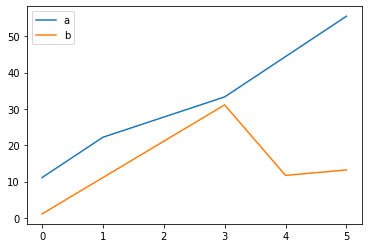

In [54]:
df_interploate.plot()

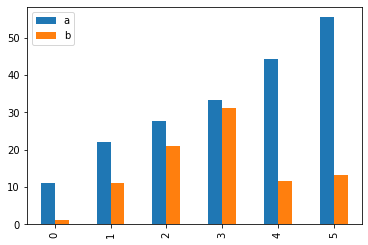

In [56]:
df_interploate.plot(kind='bar') # 使用kind指定图形样式，直方图，折线图等

## 数据合并
### axis合并方向， axis = 0为默认的合并方向

In [66]:
df1 = pd.DataFrame(np.ones((3, 4))*0, columns = ['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.ones((3, 4))*1, columns = ['a', 'b', 'c', 'd'])
df3 = pd.DataFrame(np.ones((3, 4))*2, columns = ['a', 'b', 'c', 'd'])

In [67]:
df1, df2, df3

(     a    b    c    d
 0  0.0  0.0  0.0  0.0
 1  0.0  0.0  0.0  0.0
 2  0.0  0.0  0.0  0.0,
      a    b    c    d
 0  1.0  1.0  1.0  1.0
 1  1.0  1.0  1.0  1.0
 2  1.0  1.0  1.0  1.0,
      a    b    c    d
 0  2.0  2.0  2.0  2.0
 1  2.0  2.0  2.0  2.0
 2  2.0  2.0  2.0  2.0)

In [68]:
concat = pd.concat([df1, df2, df3], axis = 0) # 按行合并

In [69]:
concat

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0
2,2.0,2.0,2.0,2.0


In [70]:
# 上述的index是重复的，那么我们将使用ignore_index处理
concat = pd.concat([df1, df2, df3], axis = 0, ignore_index = True)
concat

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0
6,2.0,2.0,2.0,2.0
7,2.0,2.0,2.0,2.0
8,2.0,2.0,2.0,2.0


### join合并
join='outer'为预设值，因此未设定任何参数时，函数默认join='outer'。此方式是依照column来做纵向合并，有相同的column上下合并在一起，其他独自的column个自成列，原本没有值的位置皆以NaN填充。

In [72]:
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'], index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'], index=[2,3,4])
concat = pd.concat([df1, df2], axis = 0, join = 'outer') # 纵向“外”合并df1与df2
df1, df2, concat

(     a    b    c    d
 1  0.0  0.0  0.0  0.0
 2  0.0  0.0  0.0  0.0
 3  0.0  0.0  0.0  0.0,
      b    c    d    e
 2  1.0  1.0  1.0  1.0
 3  1.0  1.0  1.0  1.0
 4  1.0  1.0  1.0  1.0,
      a    b    c    d    e
 1  0.0  0.0  0.0  0.0  NaN
 2  0.0  0.0  0.0  0.0  NaN
 3  0.0  0.0  0.0  0.0  NaN
 2  NaN  1.0  1.0  1.0  1.0
 3  NaN  1.0  1.0  1.0  1.0
 4  NaN  1.0  1.0  1.0  1.0)

In [73]:
concat1 = pd.concat([df1, df2], axis = 0, join = 'inner') # 相同的column合并起来
concat1

,b,c,d
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0


## Pandas合并merage
pandas中的merge和concat类似,但主要是用于两组有key column的数据,统一索引的数据. 通常也被用在Database的处理当中

In [76]:
# 依据一组key合并
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                             'A': ['A0', 'A1', 'A2', 'A3'],
                             'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                              'C': ['C0', 'C1', 'C2', 'C3'],
                              'D': ['D0', 'D1', 'D2', 'D3']})
left, right

(  key   A   B
 0  K0  A0  B0
 1  K1  A1  B1
 2  K2  A2  B2
 3  K3  A3  B3,
   key   C   D
 0  K0  C0  D0
 1  K1  C1  D1
 2  K2  C2  D2
 3  K3  C3  D3)

In [77]:
merge = pd.merge(left, right, on = 'key')
merge

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [79]:
# 依据两组key合并
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                      'key2': ['K0', 'K1', 'K0', 'K1'],
                      'A': ['A0', 'A1', 'A2', 'A3'],
                      'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                       'key2': ['K0', 'K0', 'K0', 'K0'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})
left, right

(  key1 key2   A   B
 0   K0   K0  A0  B0
 1   K0   K1  A1  B1
 2   K1   K0  A2  B2
 3   K2   K1  A3  B3,
   key1 key2   C   D
 0   K0   K0  C0  D0
 1   K1   K0  C1  D1
 2   K1   K0  C2  D2
 3   K2   K0  C3  D3)

In [83]:
#依据key1与key2 columns进行合并，并打印出四种结果['left', 'right', 'outer', 'inner']

inner = pd.merge(left, right, on = ['key1', 'key2'], how = 'inner')
outer = pd.merge(left, right, on = ['key1', 'key2'], how = 'outer')
left1 = pd.merge(left, right, on = ['key1', 'key2'], how = 'left')
right1 = pd.merge(left, right, on = ['key1', 'key2'], how = 'right')
inner, outer, left1, right1

(  key1 key2   A   B   C   D
 0   K0   K0  A0  B0  C0  D0
 1   K1   K0  A2  B2  C1  D1
 2   K1   K0  A2  B2  C2  D2,
   key1 key2    A    B    C    D
 0   K0   K0   A0   B0   C0   D0
 1   K0   K1   A1   B1  NaN  NaN
 2   K1   K0   A2   B2   C1   D1
 3   K1   K0   A2   B2   C2   D2
 4   K2   K1   A3   B3  NaN  NaN
 5   K2   K0  NaN  NaN   C3   D3,
   key1 key2   A   B    C    D
 0   K0   K0  A0  B0   C0   D0
 1   K0   K1  A1  B1  NaN  NaN
 2   K1   K0  A2  B2   C1   D1
 3   K1   K0  A2  B2   C2   D2
 4   K2   K1  A3  B3  NaN  NaN,
   key1 key2    A    B   C   D
 0   K0   K0   A0   B0  C0  D0
 1   K1   K0   A2   B2  C1  D1
 2   K1   K0   A2   B2  C2  D2
 3   K2   K0  NaN  NaN  C3  D3)

In [84]:
# 使用indicator合并记录，indictor = True：将合并的记录放在新的一列
df1 = pd.DataFrame({'col1':[0,1], 'col_left':['a','b']})
df2 = pd.DataFrame({'col1':[1,2,2],'col_right':[2,2,2]})
df1, df2

(   col1 col_left
 0     0        a
 1     1        b,
    col1  col_right
 0     1          2
 1     2          2
 2     2          2)

In [85]:
merge = pd.merge(df1, df2, on = 'col1', how = 'outer', indicator = True)
merge

,col1,col_left,col_right,_merge
0,0,a,NaN,left_only
1,1,b,2.0,both
2,2,NaN,2.0,right_only
3,2,NaN,2.0,right_only


In [87]:
# 可以自定义indictor生成的新的列的名称
merge = pd.merge(df1, df2, on = 'col1', how = 'outer', indicator = 'new_column')
merge

,col1,col_left,col_right,new_column
0,0,a,NaN,left_only
1,1,b,2.0,both
2,2,NaN,2.0,right_only
3,2,NaN,2.0,right_only


In [88]:
# 依据index合并
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])
left, right

(     A   B
 K0  A0  B0
 K1  A1  B1
 K2  A2  B2,
      C   D
 K0  C0  D0
 K2  C2  D2
 K3  C3  D3)

In [89]:
merge = pd.merge(left, right, left_index = True, right_index = True, how = 'outer') #依据左右数据集的index进行合并
merge

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [90]:
merge = pd.merge(left, right, left_index = True, right_index = True, how = 'inner') 
merge

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2
